In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('/content/drive/MyDrive/sydney_rain prediction.xlsx')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

In [5]:
df.shape

(3337, 17)

## Analyzing and treatment of missing values


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [7]:
df.MinTemp = df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp = df.MaxTemp.fillna(df.MaxTemp.mean())
df.Rainfall = df.Rainfall.fillna(df.Rainfall.mean())
df.Evaporation = df.Evaporation.fillna(df.Evaporation.mean())
df.Sunshine = df.Sunshine.fillna(df.Sunshine.mean())
df.Humidity9am = df.Humidity9am.fillna(df.Humidity9am.mean())
df.Humidity3pm = df.Humidity3pm.fillna(df.Humidity3pm.mean())
df.Pressure9am = df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm = df.Pressure3pm.fillna(df.Pressure3pm.mean())
df.Cloud9am = df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm = df.Cloud3pm.fillna(df.Cloud3pm.mean())
df.Temp9am = df.Temp9am.fillna(df.Temp9am.mean())
df.Temp3pm = df.Temp3pm.fillna(df.Temp3pm.mean())
df.RainToday = df.RainToday.fillna(df.RainToday.mode()[0])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   object  

## Getting dummy datas and dropping the date and location column

In [9]:
df = pd.get_dummies(df, columns = ['RainToday', 'RainTomorrow'], drop_first = True)

# Convert boolean columns to numerical
df['RainToday_Yes'] = df['RainToday_Yes'].astype(int)
df['RainTomorrow_Yes'] = df['RainTomorrow_Yes'].astype(int)

df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6     6.200000       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0     3.400000       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6     2.400000       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8     2.200000       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4     5.187432       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.7     20.9              1                 1  
1     22.4     24.8              1                 1  
2     23.5     23.0              1                 1  
3     21.4     20.9              1                 1  
4     22.5     25.5              1                 1

In [10]:
df = df.drop(['Date','Location'],  axis = 1)

In [11]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6     6.200000       0.0         92.0   
1     19.5     25.6       6.0     3.400000       2.7         83.0   
2     21.6     24.5       6.6     2.400000       0.1         88.0   
3     20.2     22.8      18.8     2.200000       0.0         83.0   
4     19.7     25.7      77.4     5.187432       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.9              1                 1  
1     24.8              1                 1  
2     23.0              1                 1  
3     20.9              1                 1  
4     25.5              1                 1

## Outlier Treatment

In [12]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.551593     4.493290     9.886270     2.756095     3.801737   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.200000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.053668    16.261752     7.000492     7.012157     2.505491   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.800000  1011.300000     2.000000   
50%      69.000000    56.000000  1018.500000  1016.300000     4.181523   
75%      80.000000    64.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm  RainToday_Yes  RainTomorrow_Yes  
count  3337.000000  3337.000000  3337.000000    3337.000000       3337.000000  
mean      4.218660    17.819742    21.533333       0.259515          0.259215  
std       2.409531     4.894240     4.301156       0.438434          0.438269  
min       0.000000     6.400000    10.200000       0.000000          0.000000  
25%       2.000000    13.800000    18.400000       0.000000          0.000000  
50%       4.218660    18.200000    21.300000       0.000000          0.000000  
75%       7.000000    21.700000    24.500000       1.000000          1.000000  
max       8.000000    36.500000    44.700000       1.000000          1.000000

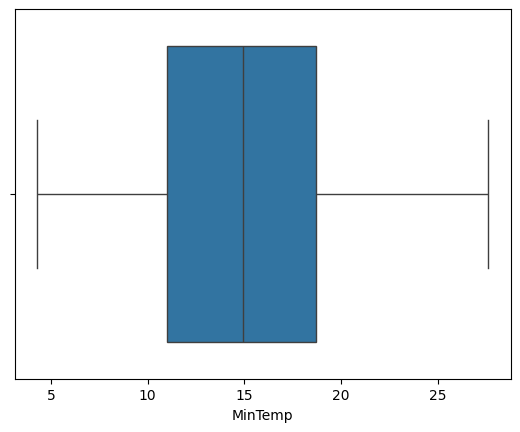

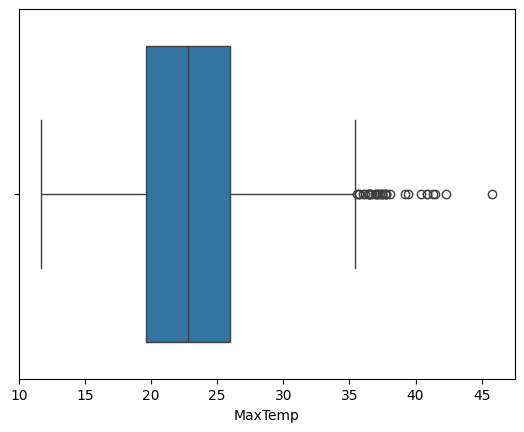

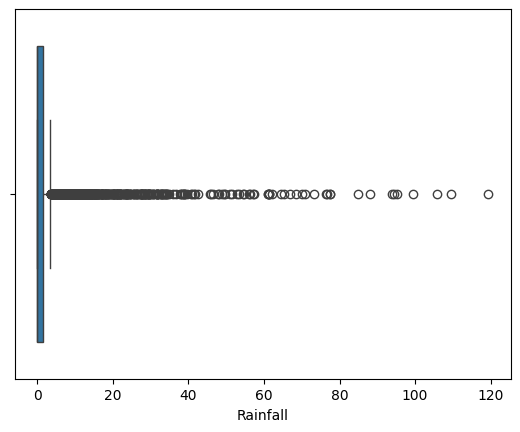

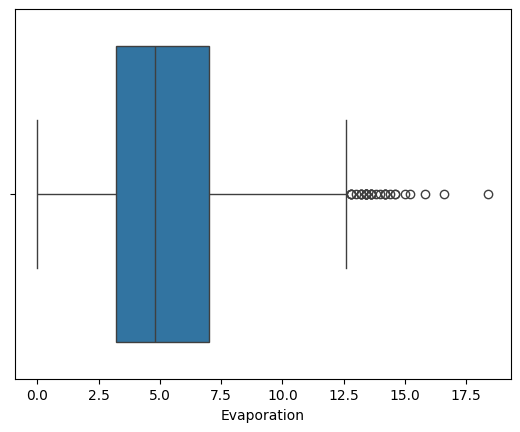

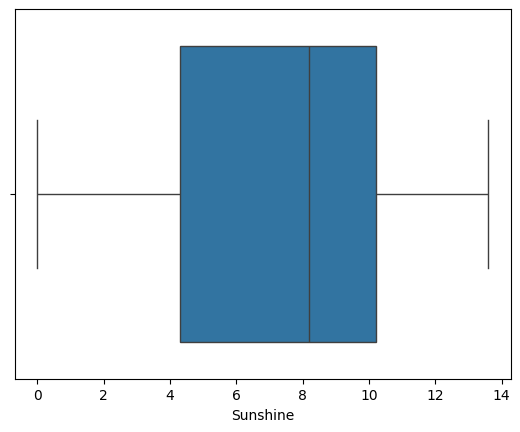

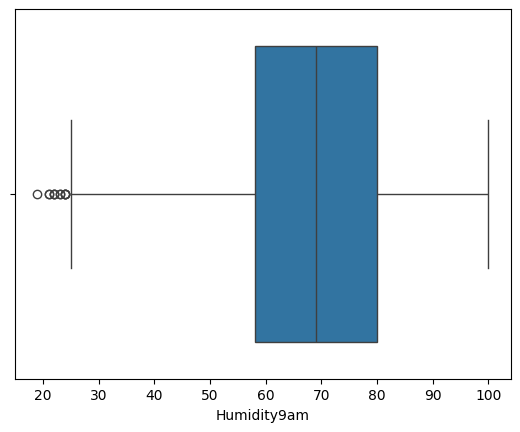

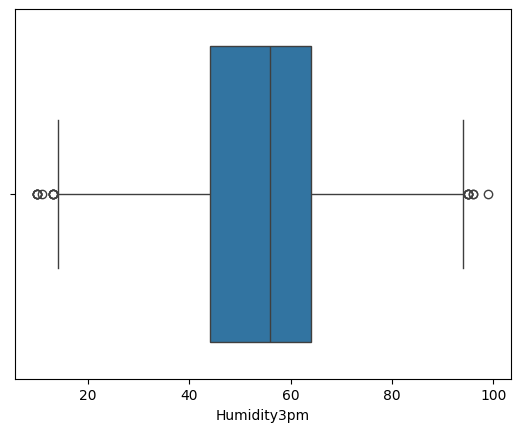

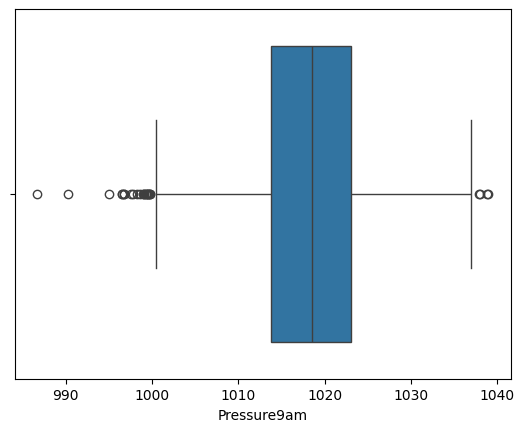

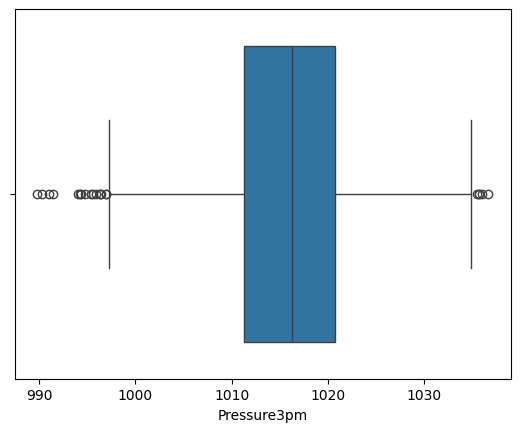

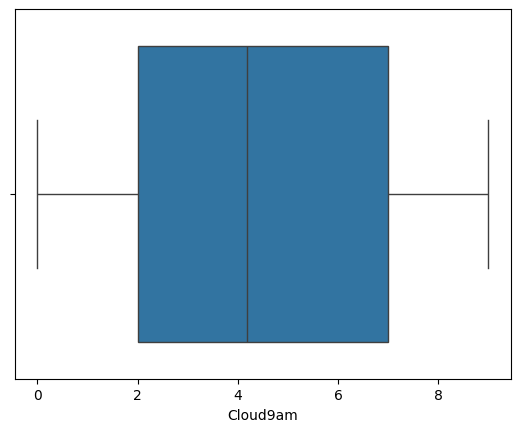

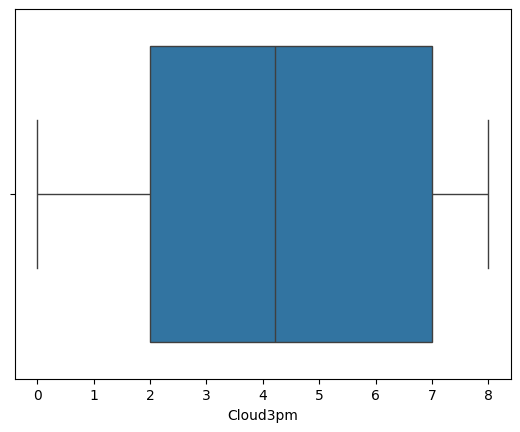

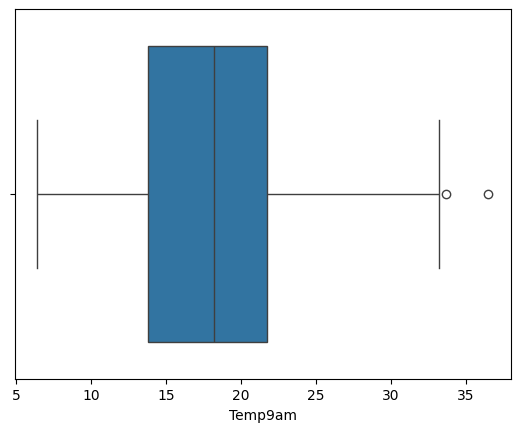

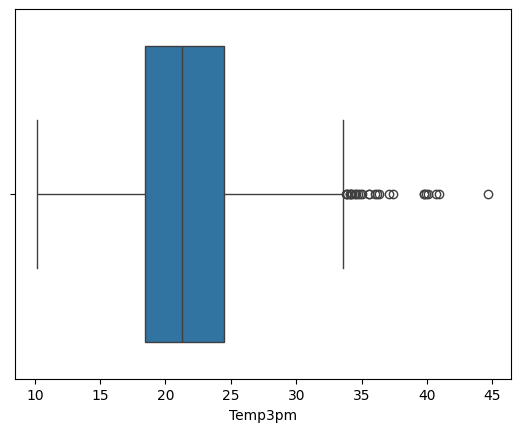

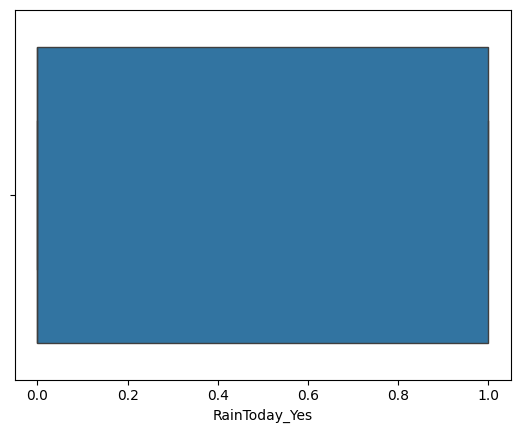

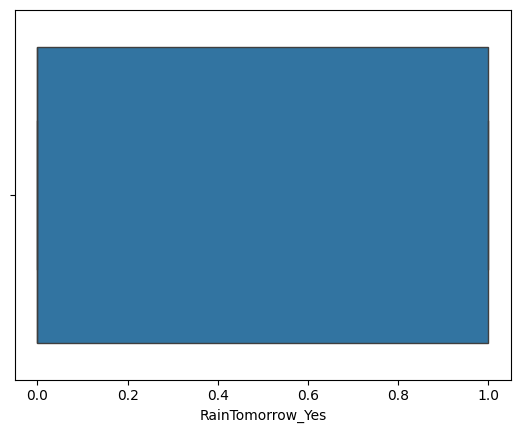

In [13]:
#check for outliers using seaborn

# Create box plots for each numerical feature
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

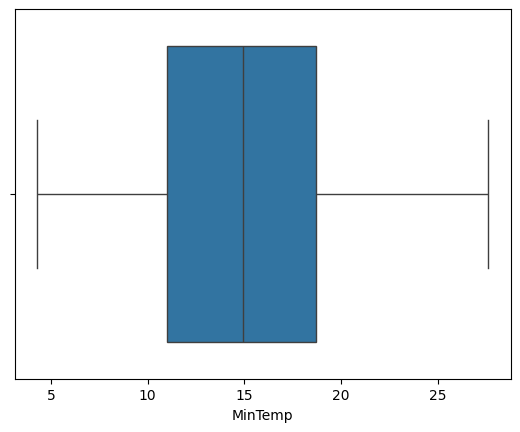

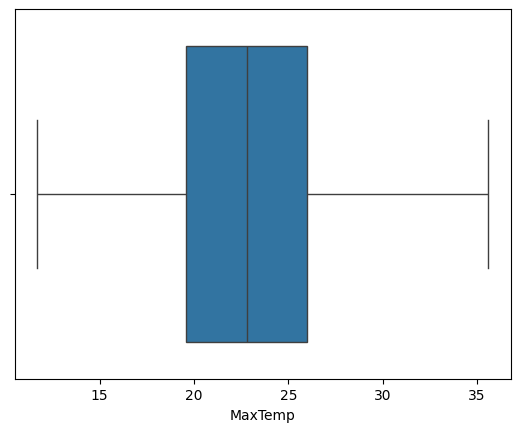

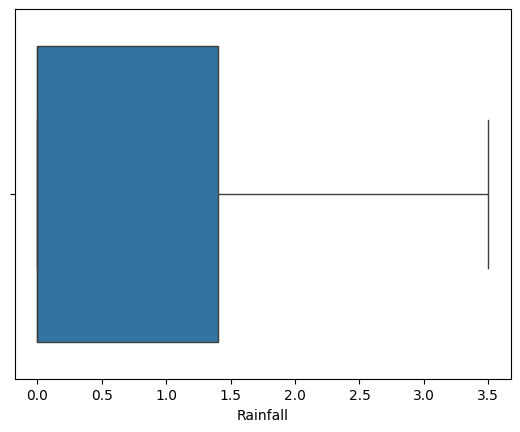

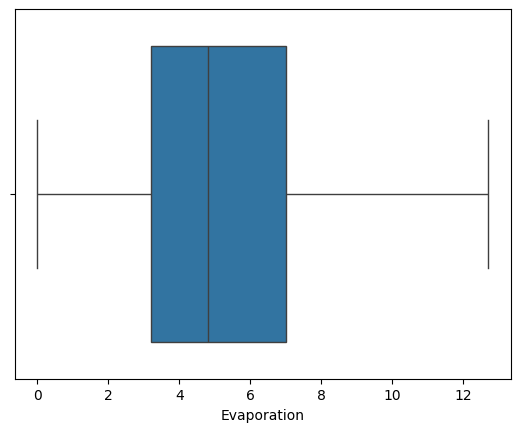

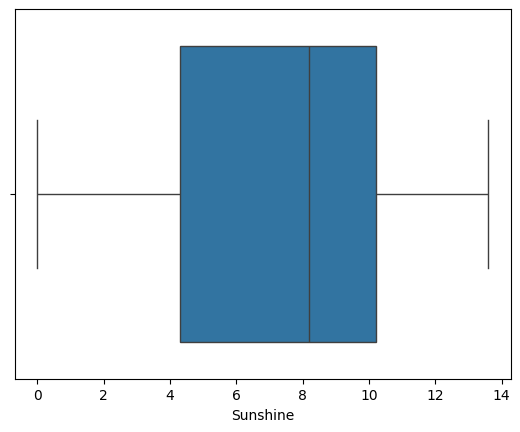

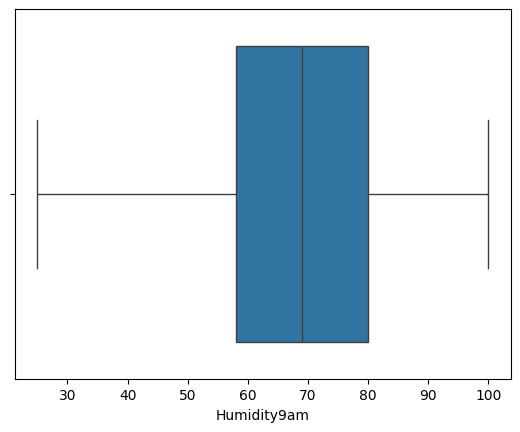

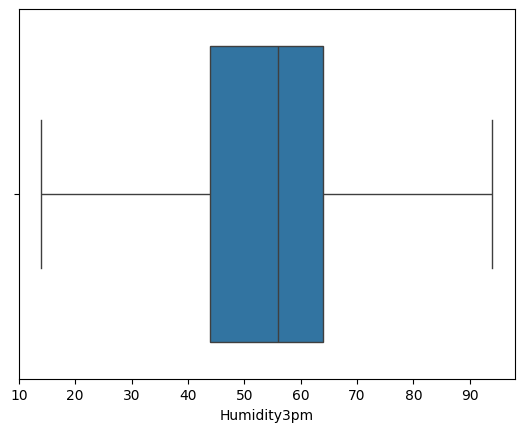

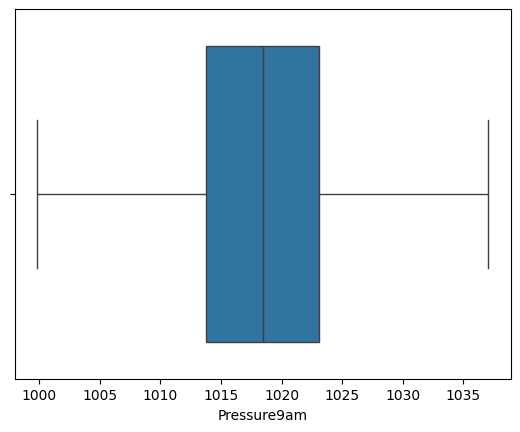

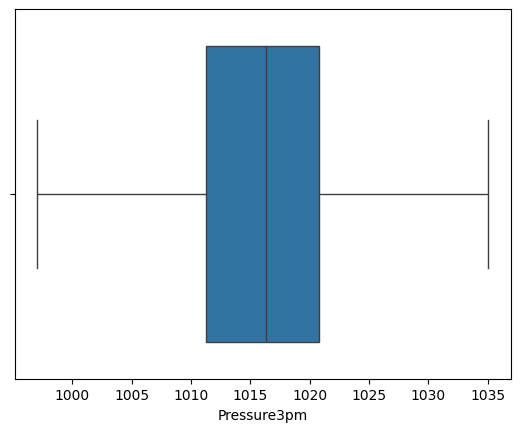

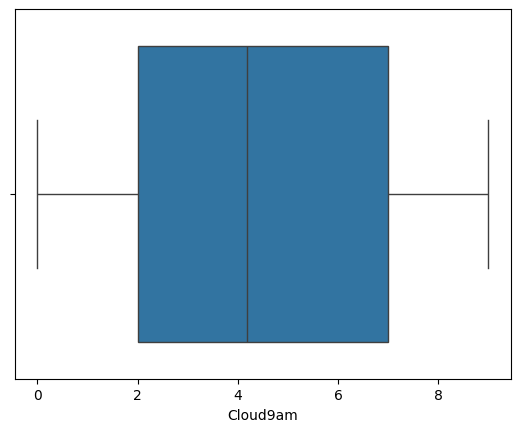

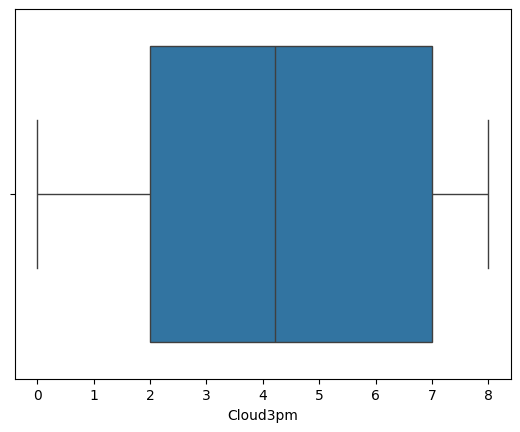

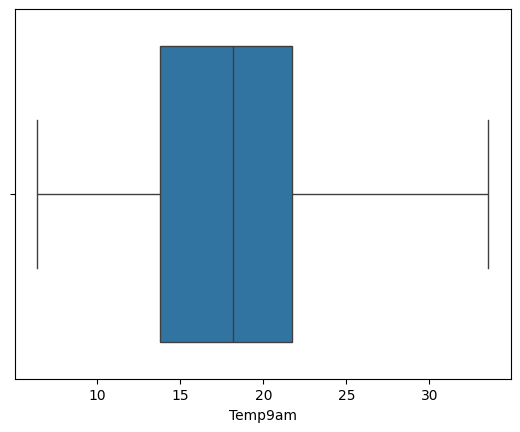

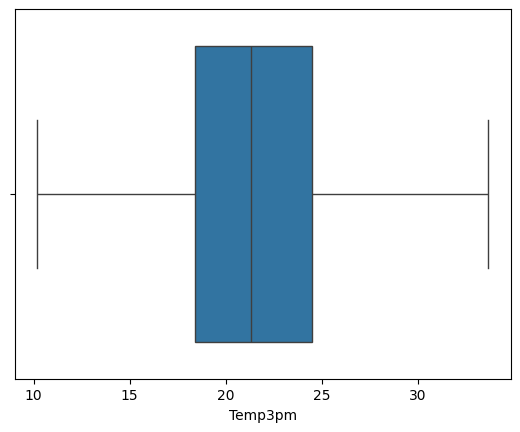

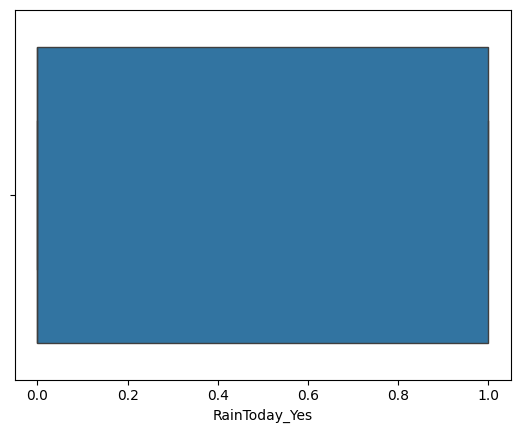

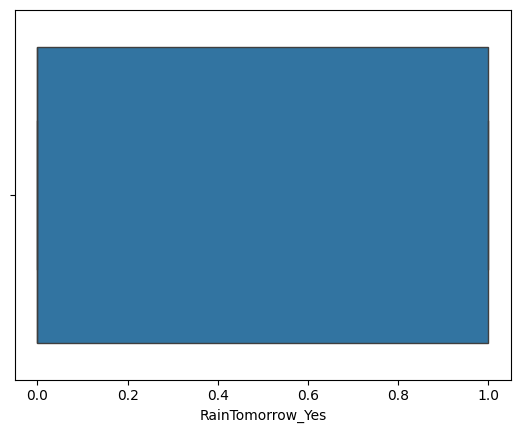

In [14]:
def treat_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# List of numerical columns to check for outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Apply the outlier treatment
df = treat_outliers_iqr(df, numerical_columns)

# Again create box plots for each numerical feature
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

## Visualization

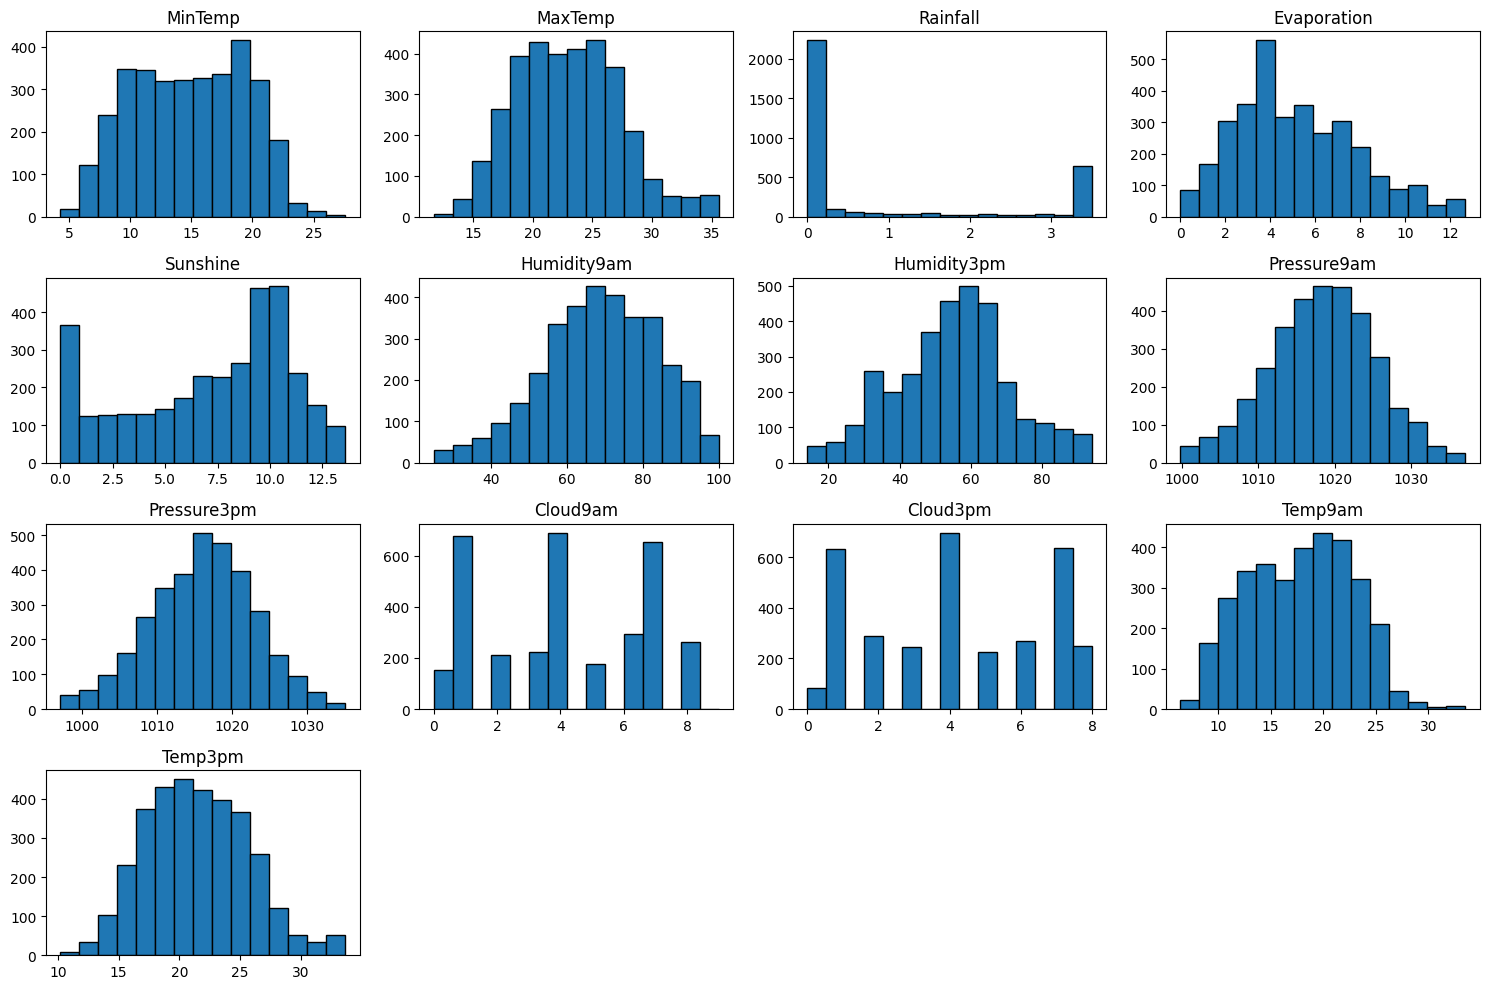

In [15]:
# Plot histograms for numerical features
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                      'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                      'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[column], bins=15, edgecolor='k')
    plt.title(column)
plt.tight_layout()
plt.show()

<ipython-input-16-9866ea43d176>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainToday_Yes', data=df, ax=axes[0], palette='viridis')
<ipython-input-16-9866ea43d176>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow_Yes', data=df, ax=axes[1], palette='viridis')


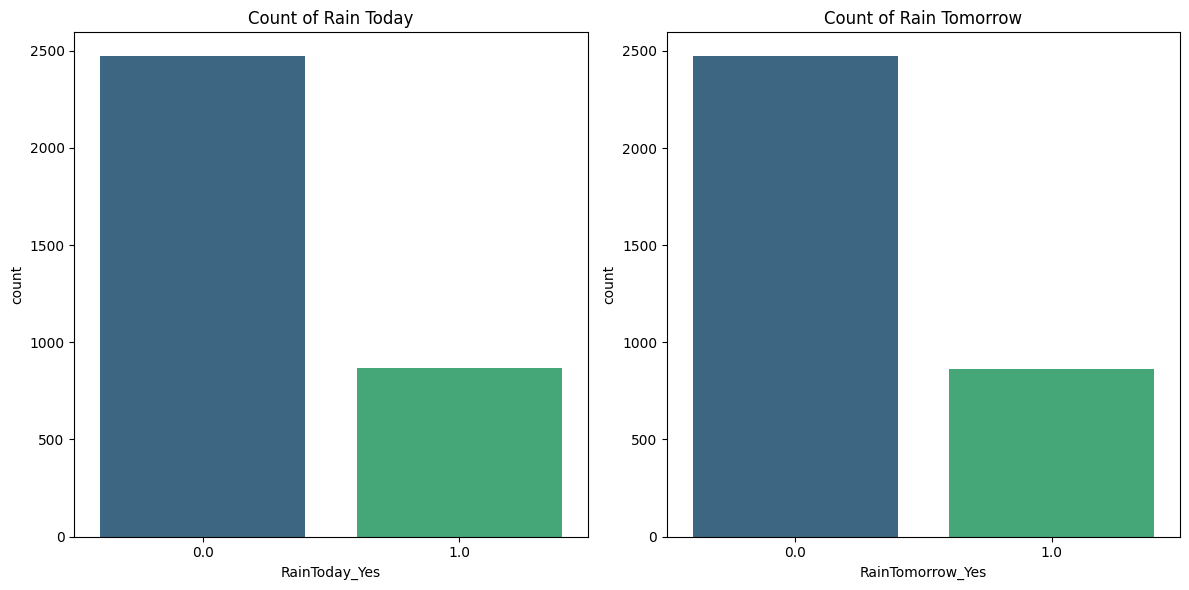

In [16]:
# Plot count plots for categorical columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count plot for RainToday
sns.countplot(x='RainToday_Yes', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Count of Rain Today')

# Count plot for RainTomorrow
sns.countplot(x='RainTomorrow_Yes', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Count of Rain Tomorrow')

plt.tight_layout()
plt.show()

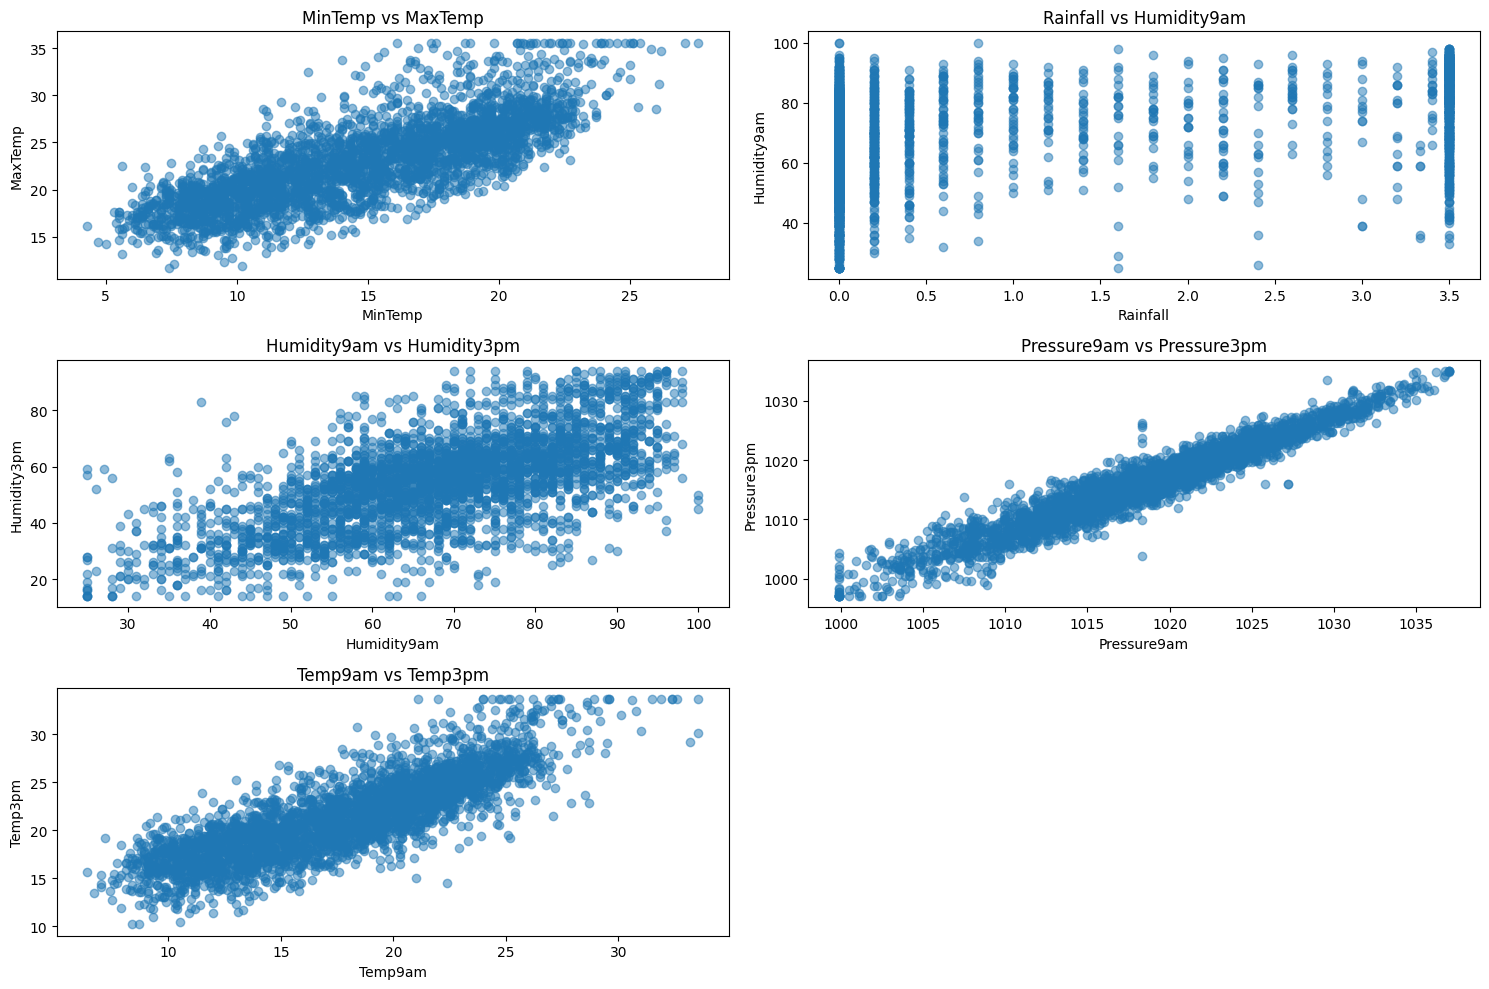

In [17]:
# Scatterplot
selected_pairs = [
    ('MinTemp', 'MaxTemp'),
    ('Rainfall', 'Humidity9am'),
    ('Humidity9am', 'Humidity3pm'),
    ('Pressure9am', 'Pressure3pm'),
    ('Temp9am', 'Temp3pm')
]

plt.figure(figsize=(15, 10))
for i, (feature1, feature2) in enumerate(selected_pairs, 1):
    plt.subplot(3, 2, i)
    plt.scatter(df[feature1], df[feature2], alpha=0.5)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'{feature1} vs {feature2}')
plt.tight_layout()
plt.show()

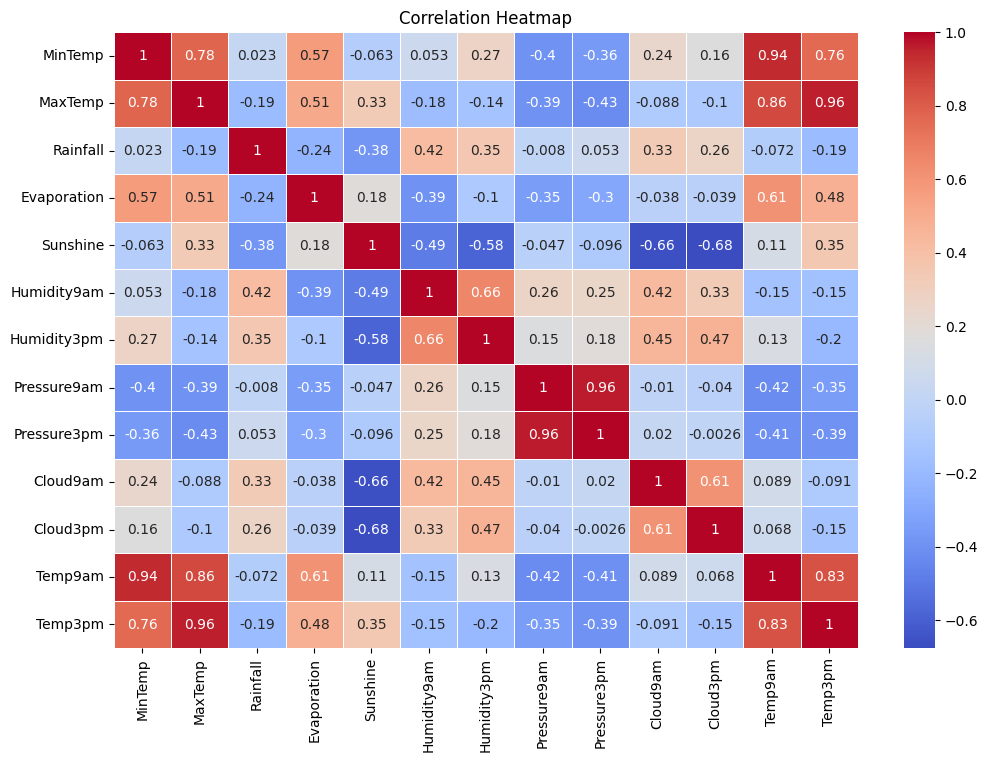

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

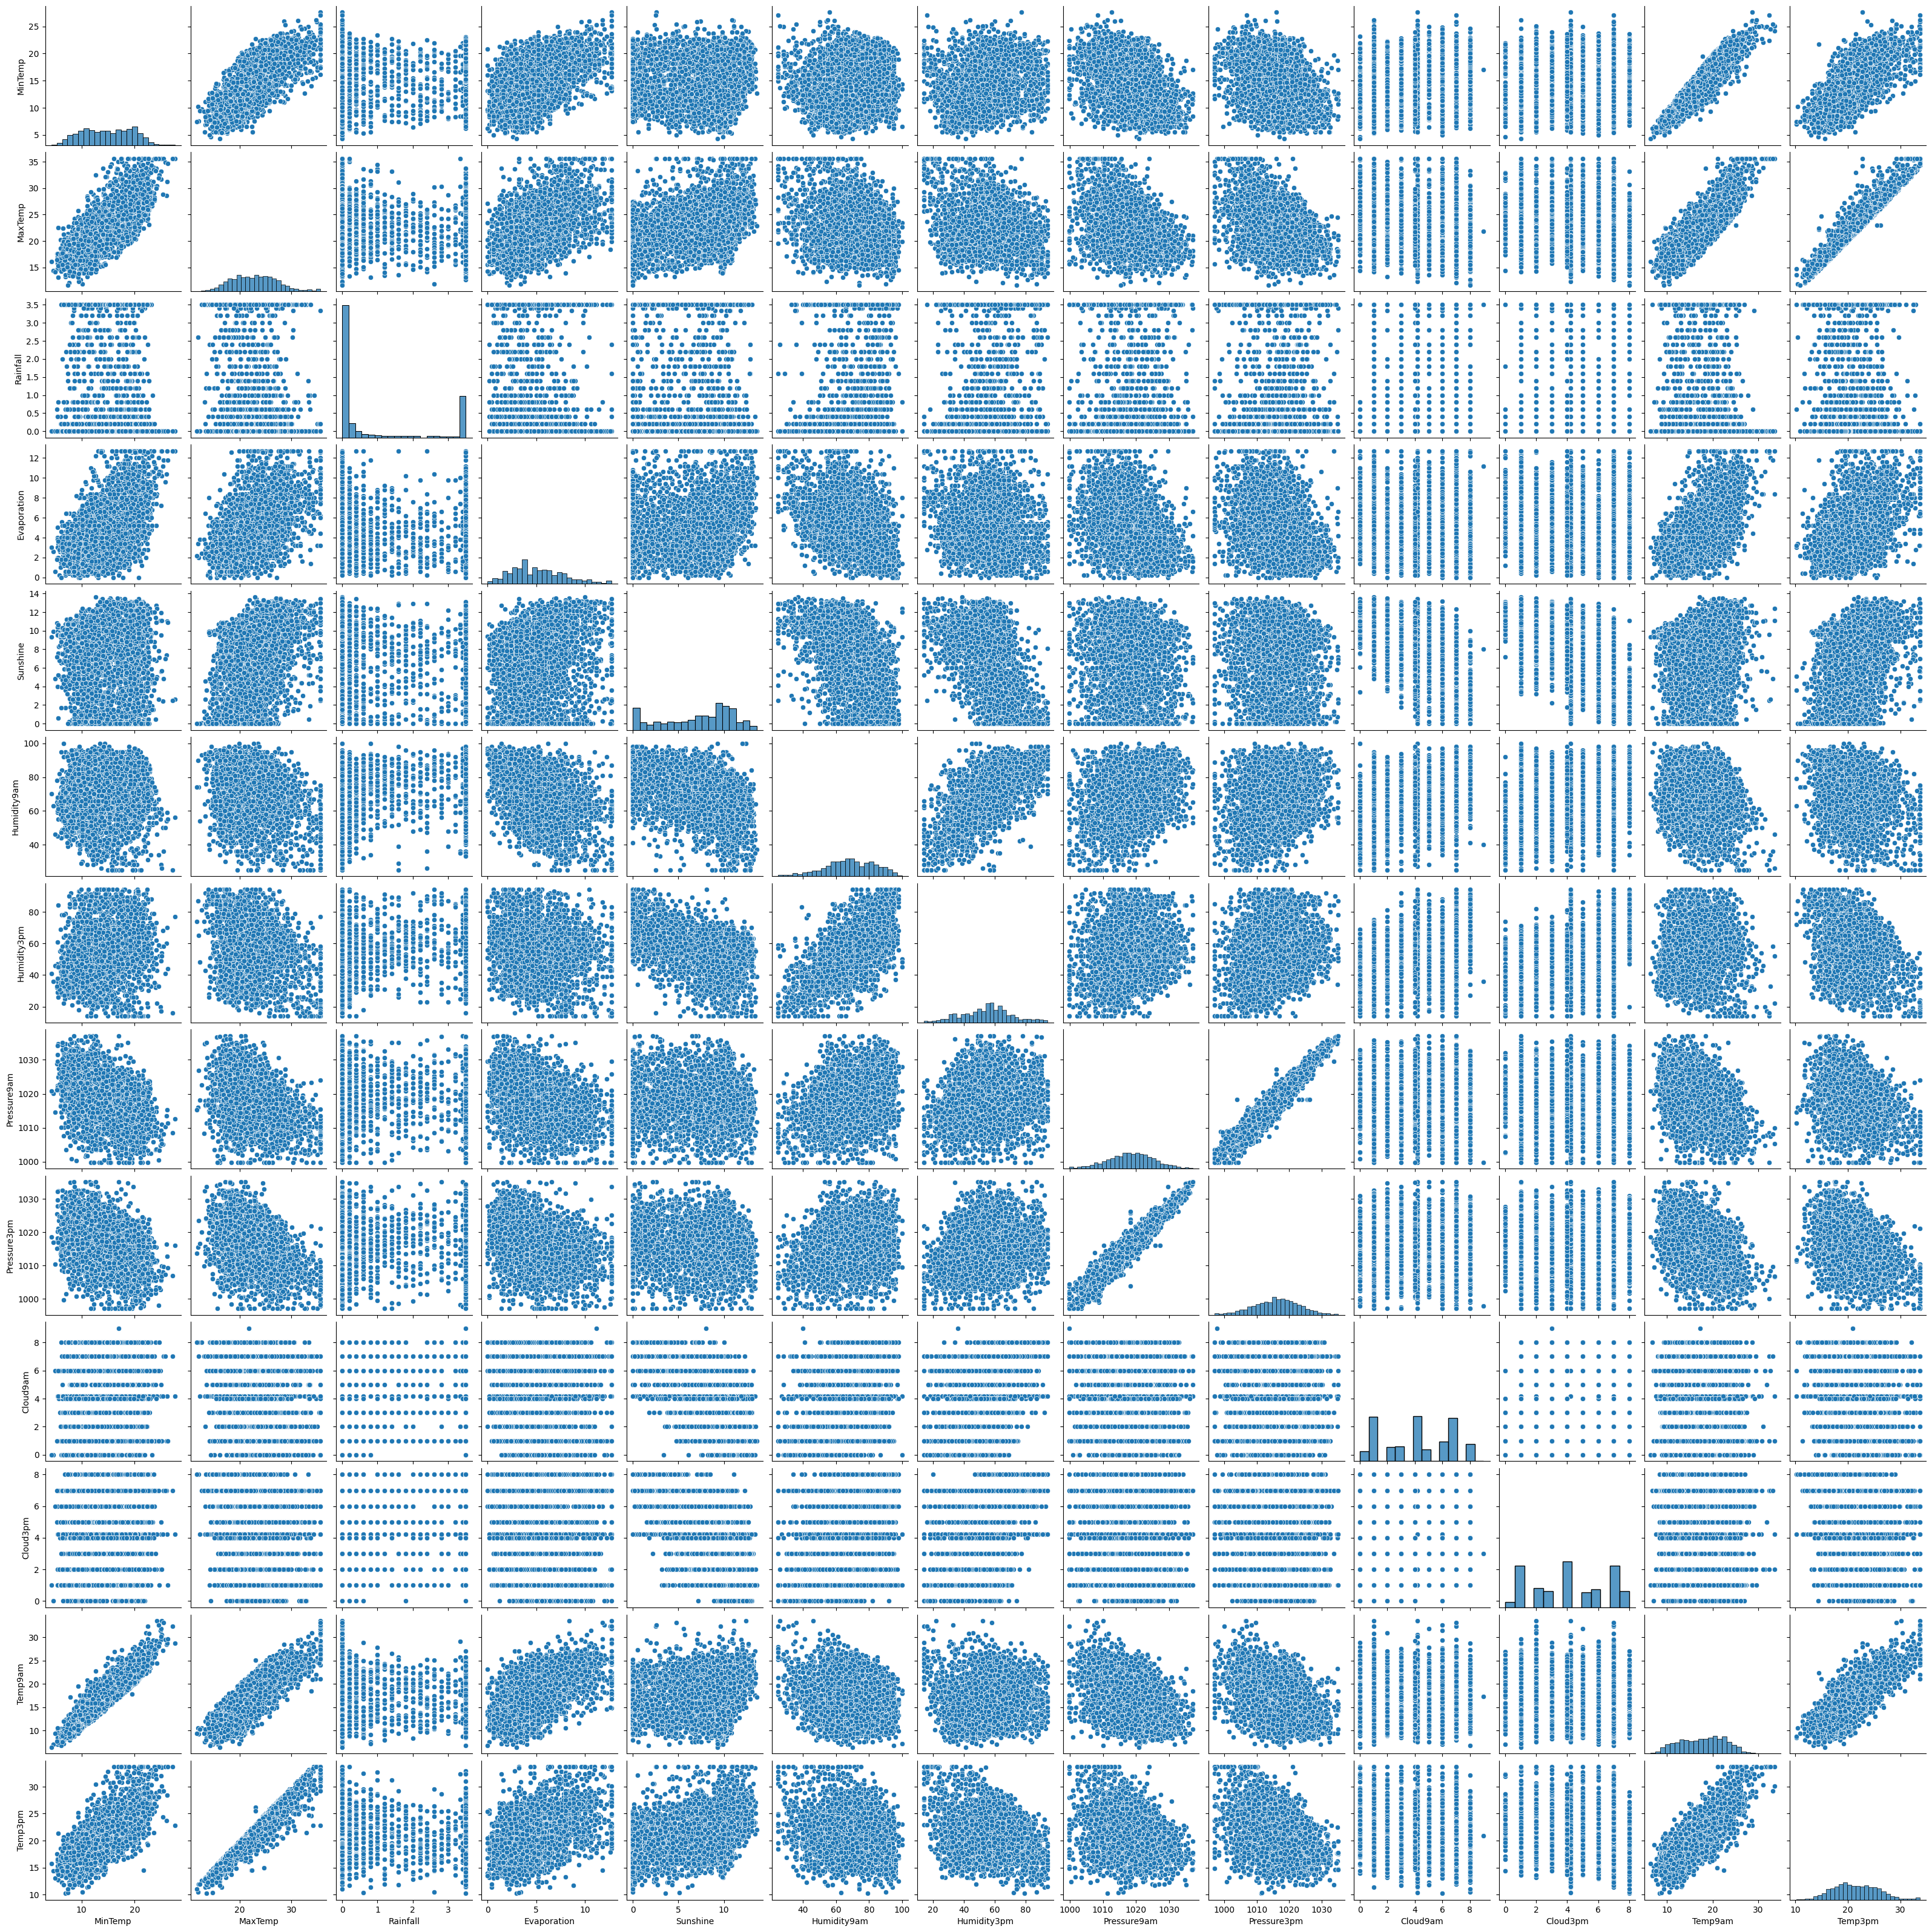

In [19]:
# Pairplot for numerical features
sns.pairplot(df[numerical_features])
plt.show()

## Decision Tree

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

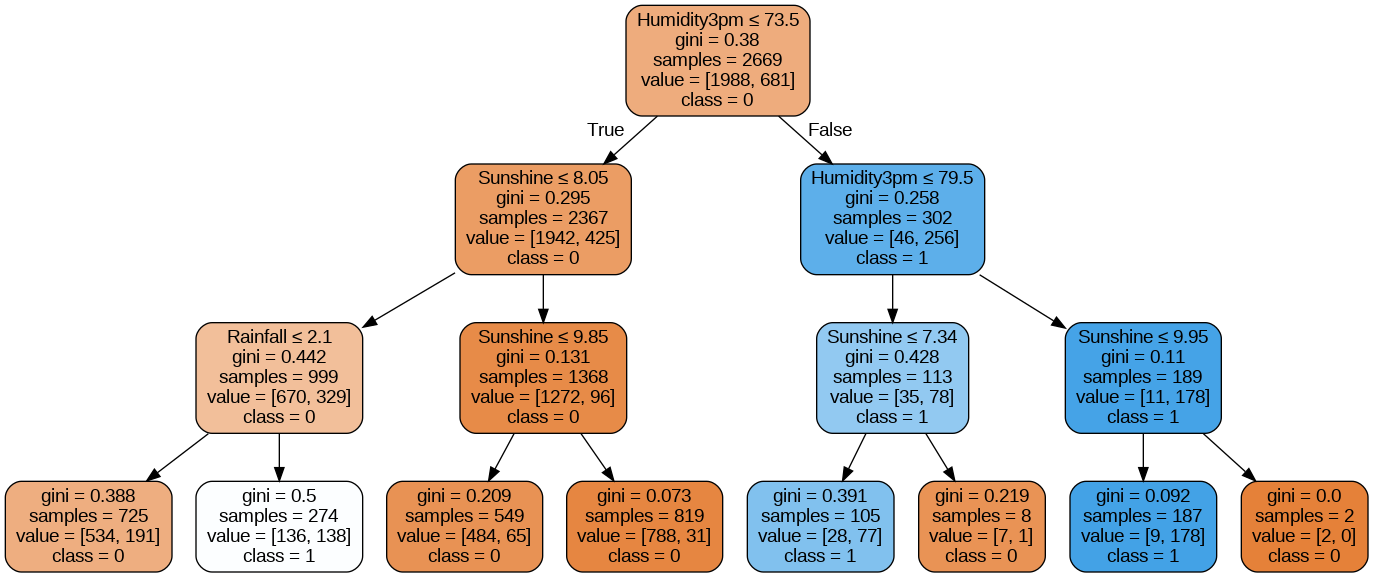

In [21]:
# Separate features (X) and target variable (y)
X = df.drop('RainTomorrow_Yes', axis = 1)
y = df['RainTomorrow_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
clf_tree = DecisionTreeClassifier(max_depth = 3)
clf_tree.fit(X_train, y_train)

# Fit the classifier
clf_tree.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = clf_tree.predict(X_test)
y_train_pred = clf_tree.predict(X_train)

# Visualize the Decision Tree
dot_data = export_graphviz(clf_tree, out_file=None,
                           feature_names=X.columns.tolist(),
                           class_names=['0', '1'],  # Replace with your class labels if categorical
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree', view=True)

# Display the decision tree
Image(filename='decision_tree.png')

### Computation on accuracy

In [22]:
# Evaluate the model for test dataset
y_test_pred = clf_tree.predict(X_test)
accuracy_test_dt = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy_test_dt)

# Evaluate the model for train dataset
y_train_pred = clf_tree.predict(X_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy_train_dt)

Accuracy on test set: 0.8023952095808383
Accuracy on train set: 0.8272761333832896


### Confusion Matrix for Decision Tree

In [23]:
# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[430  54]
 [ 78 106]]


In [24]:
# Compute precision and recall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.6625
Recall: 0.5760869565217391


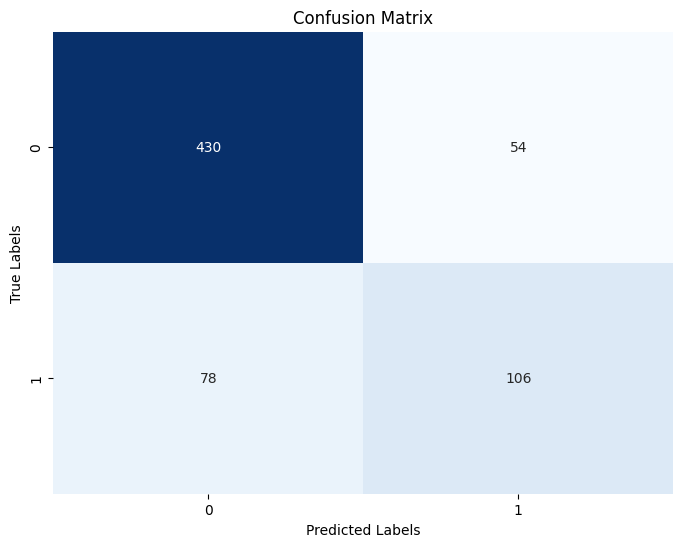

In [25]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Ensemble Techniques

## RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on test and train data
y_test_pred = rf_classifier.predict(X_test)
y_train_pred = rf_classifier.predict(X_train)


## Computation on accuracy

In [27]:
# Evaluate the model for test dataset
y_test_pred = rf_classifier.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy_test_rf)

# Evaluate the model for train dataset
y_train_pred = rf_classifier.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy_train_rf)



Accuracy on test set: 0.812874251497006
Accuracy on train set: 0.9883851629823904


### Confusion Matrix for Random Forest (Bagging)

In [28]:
# Compute confusion matrix
confmat_rf = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(confmat_rf)

Confusion Matrix:
[[446  38]
 [ 87  97]]


In [29]:
# Compute precision and recall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7185185185185186
Recall: 0.5271739130434783


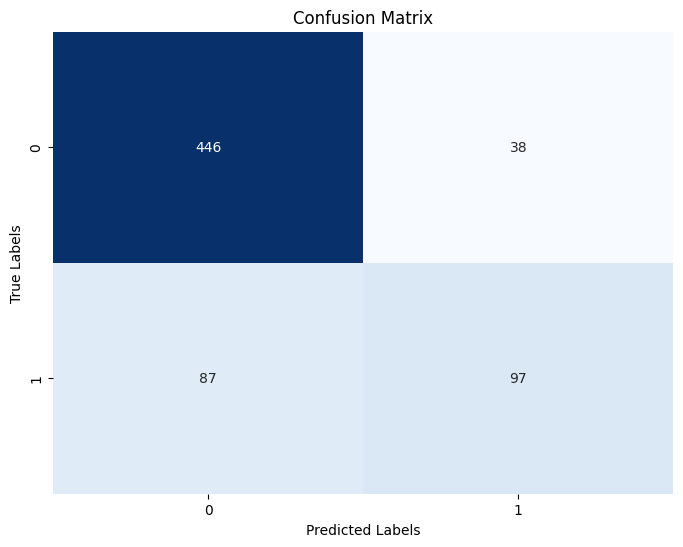

In [30]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confmat_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## AdaBoostClassifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1), n_estimators=10, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Predict on test and train data
y_test_pred = adaboost_classifier.predict(X_test)
y_train_pred = adaboost_classifier.predict(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Computation on accuracy

In [33]:
# Evaluate the model for test dataset
y_test_pred = adaboost_classifier.predict(X_test)
accuracy_test_ada = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy_test_ada)

# Evaluate the model for train dataset
y_train_pred = adaboost_classifier.predict(X_train)
accuracy_train_ada = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy_train_ada)


Accuracy on test set: 0.8218562874251497
Accuracy on train set: 0.8430123641813413


## Confusion Matrix for AdaBoost

In [34]:
# Compute confusion matrix
confmat_ada = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(confmat_ada)

Confusion Matrix:
[[455  29]
 [ 90  94]]


In [35]:
# Compute precision and recall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7642276422764228
Recall: 0.5108695652173914


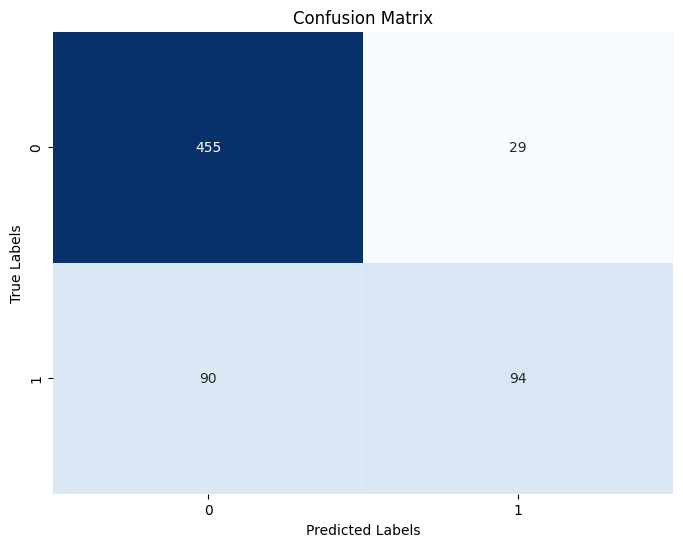

In [36]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confmat_ada, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## GradientBoostingClassifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)

# Train the classifier
gb_clf.fit(X_train, y_train)

# Predictions on test set
y_test_pred = gb_clf.predict(X_test)
y_train_pred = gb_clf.predict(X_train)

## Computation on accuracy

In [39]:
# Evaluate the model for test dataset
y_test_pred = gb_clf.predict(X_test)
accuracy_test_gb = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy_test_gb)

# Evaluate the model for train dataset
y_train_pred = gb_clf.predict(X_train)
accuracy_train_gb = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy_train_gb)

Accuracy on test set: 0.8218562874251497
Accuracy on train set: 0.8385162982390408


## Confusion Matrix for Gradient Boosting

In [40]:
# Compute confusion matrix
confmat_gb = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(confmat_gb)

Confusion Matrix:
[[470  14]
 [105  79]]


In [41]:
# Compute precision and recall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8494623655913979
Recall: 0.42934782608695654


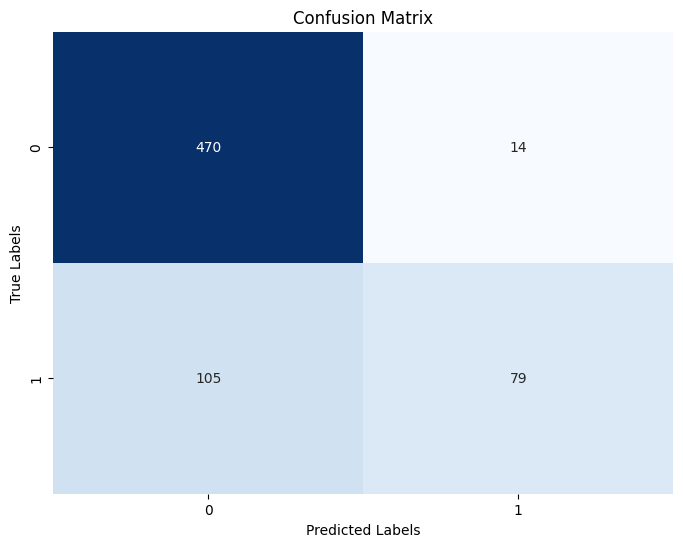

In [42]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confmat_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Bagging

In [43]:
from sklearn.ensemble import BaggingClassifier

In [44]:
# Train a Bagging classifier
Bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
Bagging.fit(X_train, y_train)

# Predict on the test set
y_test_pred = Bagging.predict(X_test)
y_train_pred = Bagging.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Computation of Accuracy

In [49]:
# Evaluate the model for test dataset
y_test_pred = Bagging.predict(X_test)
accuracy_test_bag = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy_test_bag)

# Evaluate the model for train dataset
y_train_pred = Bagging.predict(X_train)
accuracy_train_bag = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy_train_bag)

Accuracy on test set: 0.8338323353293413
Accuracy on train set: 0.9621581116523042


## Confusion Matrix for Bagging

In [45]:
# Compute confusion matrix
confmat_bag = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(confmat_bag)

Confusion Matrix:
[[455  29]
 [ 82 102]]


In [46]:
# Compute precision and recall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7786259541984732
Recall: 0.5543478260869565


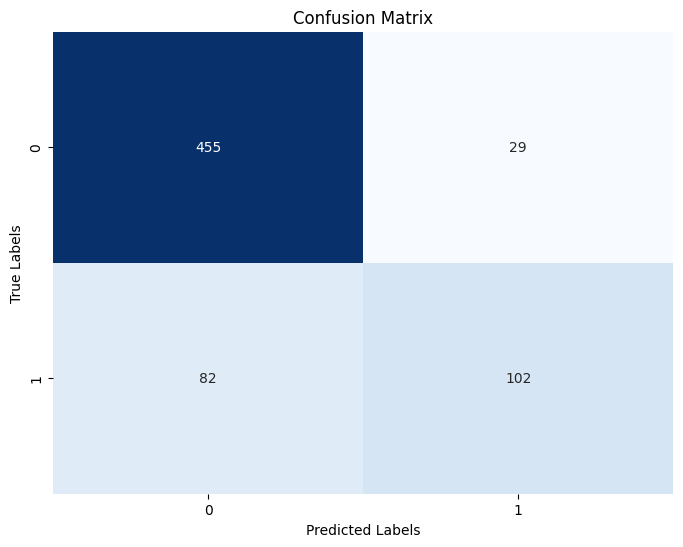

In [47]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confmat_bag, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Comparison

<ipython-input-50-a4b616fd866d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette=colors)


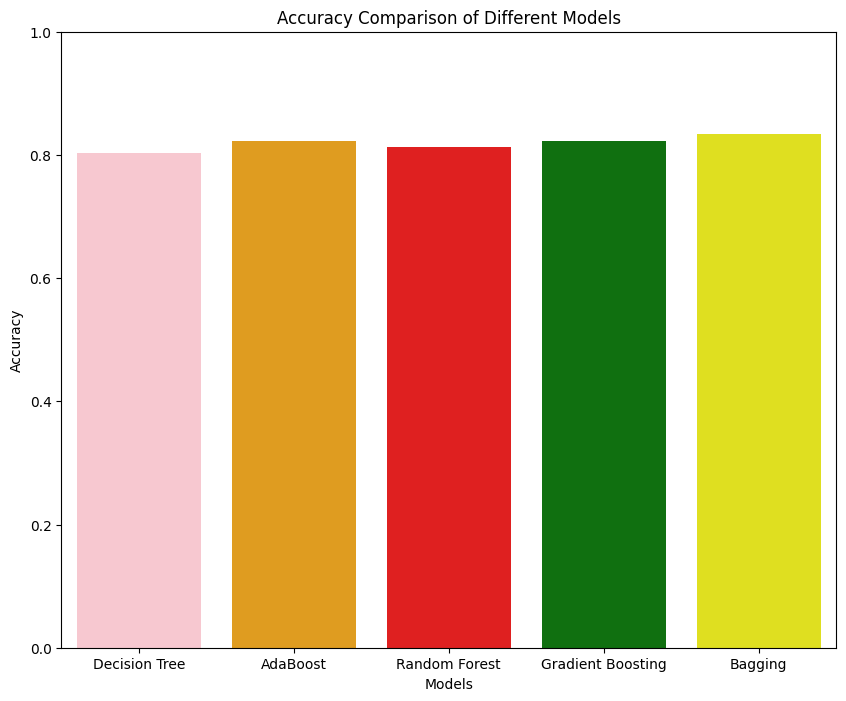

In [50]:
models = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Gradient Boosting', 'Bagging']
accuracies = [accuracy_test_dt, accuracy_test_ada, accuracy_test_rf, accuracy_test_gb, accuracy_test_bag ]
colors = ['pink', 'orange', 'red', 'green', 'yellow']

plt.figure(figsize=(10, 8))
sns.barplot(x=models, y=accuracies, palette=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

## Questions and Answers

**1. Your views about the problem statement?**

Based on my understanding, The Daily Buzz was a small newspaper company which gained reputation for its high-quality journalism and its commitment to the truth. Since, they were struggling to attract more readers, they introduced a new column called "The
Weather Oracle". This received a great positive response from many readers. Thus, the daily buzz wanted to improve the future prediction of rainfall. This would help in accurate rainfall prediction in future as it would help the readers plan their work accordingly.



**2. What will be your approach to solving this task?**

The approach in solving the task involved:

(1) Loading of dataset

(2) Missing information treatment

(3) Outlier treatment

(5) Dummy values

(6) Visualizations

(7) Implementing various machine learning models

(8) Analyzing which model is a better fit model for prediction.

**3. What were the available ML model options you had to perform this task?**

The available ML models were:

(1) Decision Tree

(2) Ensemble model - Random Forest, Ada Boosting, Bagging, Boosting, Gradient Boosting

**4. Which model’s performance is best and what could be the possible reason for that?**

Bagging is the best fit model followed by ada boosting and gradient boosting. They are ensemble models. They provide better results as they are combined with multiple individual models to improve the overall performance.

**5. What steps can you take to improve this selected model’s performance even further?**

To further improve the performance of Bagging, we can consider:

(1) Feature Engineering

(2) Hyperparameter Tuning

(3) Neural network models